# 1. Univariate logistic regression from scratch

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils import *

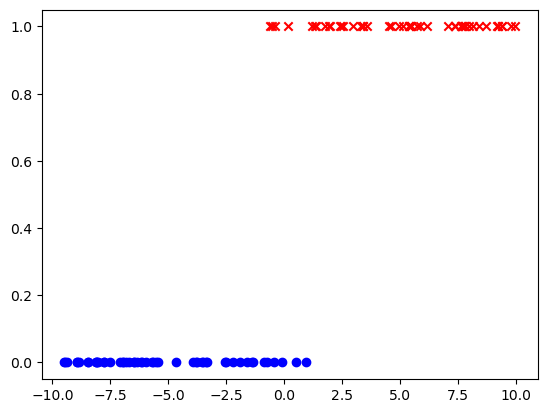

In [2]:
x_train = generate_univariate_x(100)
y_train = generate_binary_y(100)
plt_binary_classification(x_train, y_train)
plt.show()

In [3]:
w_init, b_init = 0, 0
iterations = 10000
alpha = 1.0e-2

w_final, b_final, J_hist = gradient_descent_logistic(x_train, y_train, w_init, b_init, compute_cost_logistic, compute_gradient_logistic ,alpha, iterations)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost     0.63
Iteration  1000: Cost     0.10
Iteration  2000: Cost     0.10
Iteration  3000: Cost     0.10
Iteration  4000: Cost     0.10
Iteration  5000: Cost     0.10
Iteration  6000: Cost     0.10
Iteration  7000: Cost     0.10
Iteration  8000: Cost     0.10
Iteration  9000: Cost     0.10
(w,b) found by gradient descent: (  1.6047, -0.0335)


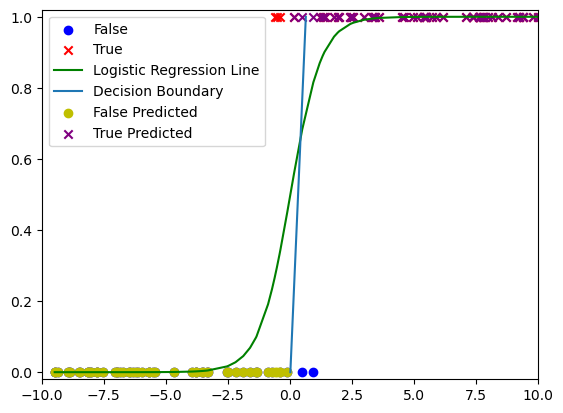

In [4]:
y_pred = sigmoid(x_train * w_final + b_final)
plt_binary_classification(x_train, y_train)
plt.plot(x_train, y_pred, 'g-')
x_intersect_1 = -b_final / w_final
x_intersect_2 = (1 - b_final) / w_final
plt.plot([x_intersect_1, x_intersect_2], [0, 1])

y_pred = np.where(y_pred < 0.5, 0, 1)
plt.scatter(x_train[y_pred == 0], y_pred[y_pred == 0], marker='o', c='y')
plt.scatter(x_train[y_pred == 1], y_pred[y_pred == 1], marker='x', c='purple')

plt.axis([-10, 10, -0.02, 1.02])
plt.legend(['False', 'True', 'Logistic Regression Line', 'Decision Boundary', 'False Predicted', 'True Predicted' ])
plt.show()

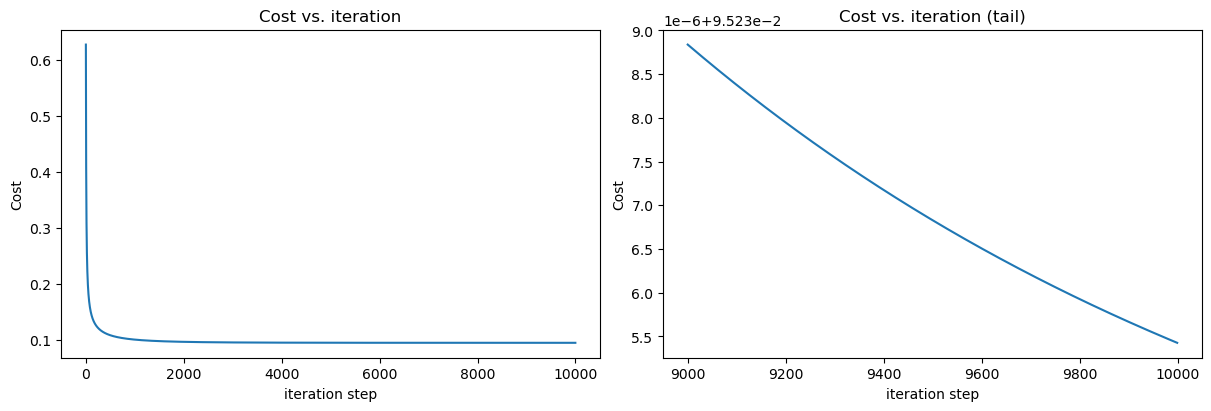

In [5]:
plt_hist(J_hist)
plt.show()

In [6]:
f1 = f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")
print(f"Cost: {J_hist[-1]:8.4f}")

f1 score:   0.9485
accuracy:   0.9500
Cost:   0.0952


# 2. Univariate logistic regression using sklearn

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, f1_score, accuracy_score

In [8]:
log_reg = LogisticRegression()
log_reg.fit(x_train.reshape(-1, 1), y_train)
w_final = log_reg.coef_[0][0]
b_final = log_reg.intercept_[0]
print(f"(w,b) found by sklearn: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by sklearn: (  1.3329, -0.0437)


In [9]:
y_pred = log_reg.predict(x_train.reshape(-1, 1))

f1 = f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
cost = log_loss(y_train, y_pred)

print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")
print(f"cost: {cost:8.4f}")

f1 score:   0.9485
accuracy:   0.9500
cost:   1.7270
